https://www.kaggle.com/datasets/shilongzhuang/pizza-sales

In [1]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install openpyxl

C:\Users\HP\AppData\Local\Temp\ipykernel_23432\3106974505.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
#import excel file
df = pd.read_excel('Data Model - Pizza Sales.xlsx')

In [3]:
df.shape

(48620, 12)

In [4]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [6]:
pd.isnull(df).sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


<h1>Exploratory Data Analysis</h1>

Pizza category total count

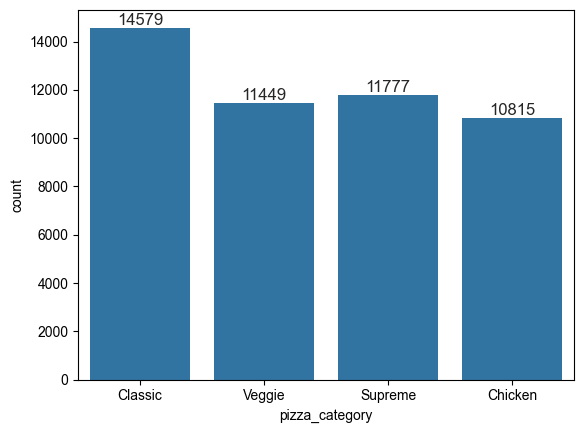

In [9]:
ax = sns.countplot(x = 'pizza_category', data = df)
sns.set(rc = {'figure.figsize':(6,4)})
for bars in ax.containers:
    ax.bar_label(bars)

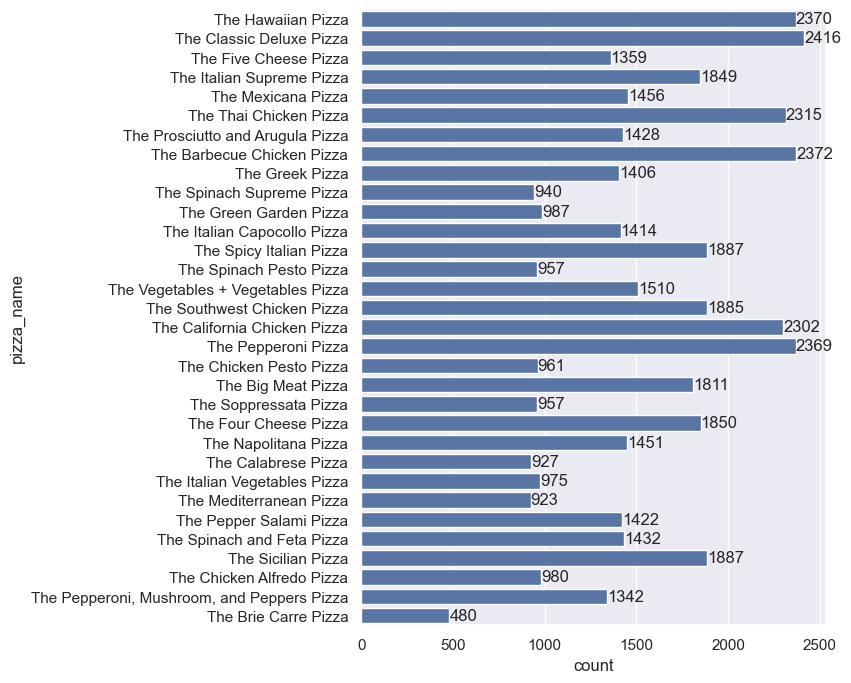

In [28]:
ax = sns.countplot(y = 'pizza_name', data = df)
sns.set(rc = {'figure.figsize':(7,8)}) #26,60)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='pizza_id', ylabel='total_price'>

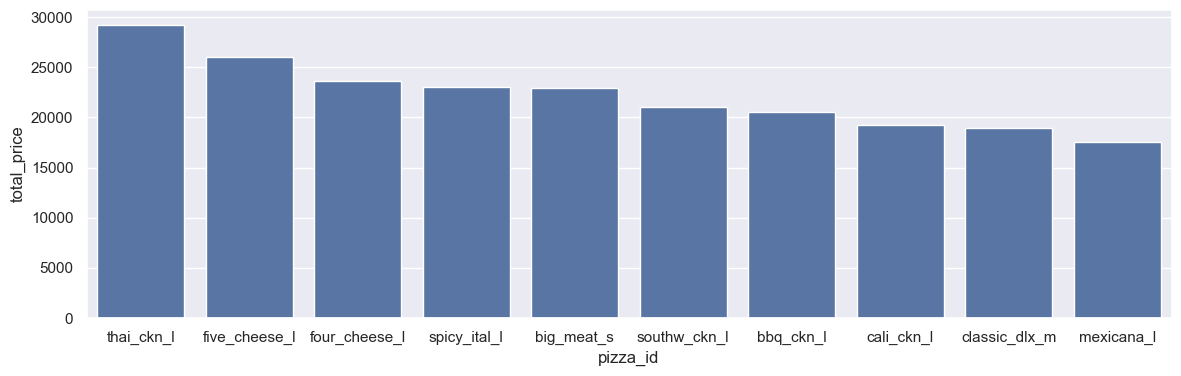

In [11]:
sales_gen = df.groupby(['pizza_id'], as_index = False)['total_price'].sum().sort_values(by = 'total_price', ascending = False).head(10)
sns.set(rc = {'figure.figsize': (14,4)})
sns.barplot(x = 'pizza_id', y = 'total_price', data = sales_gen)

<Axes: xlabel='pizza_id', ylabel='quantity'>

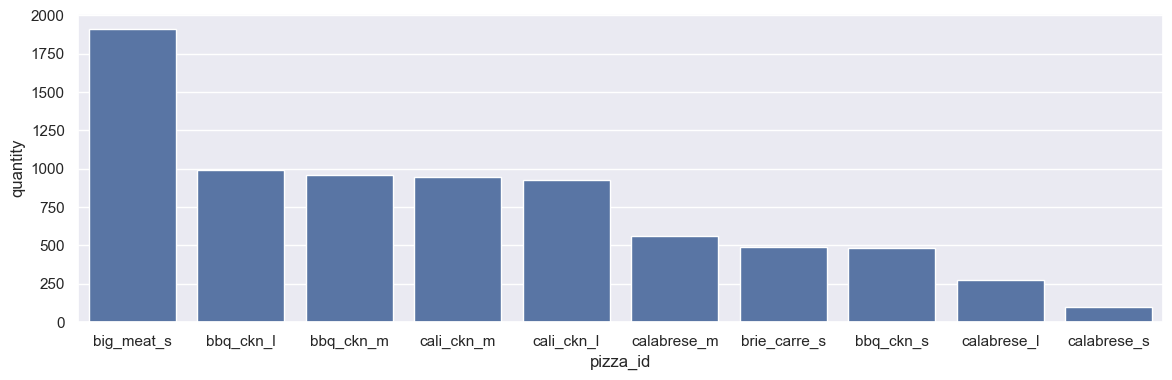

In [12]:
sales_gen = df.groupby(['pizza_id'], as_index = False)['quantity'].sum().head(10).sort_values(by = 'quantity', ascending = False)
sns.barplot(x = 'pizza_id', y = 'quantity', data = sales_gen)

<Axes: xlabel='pizza_id', ylabel='total_price'>

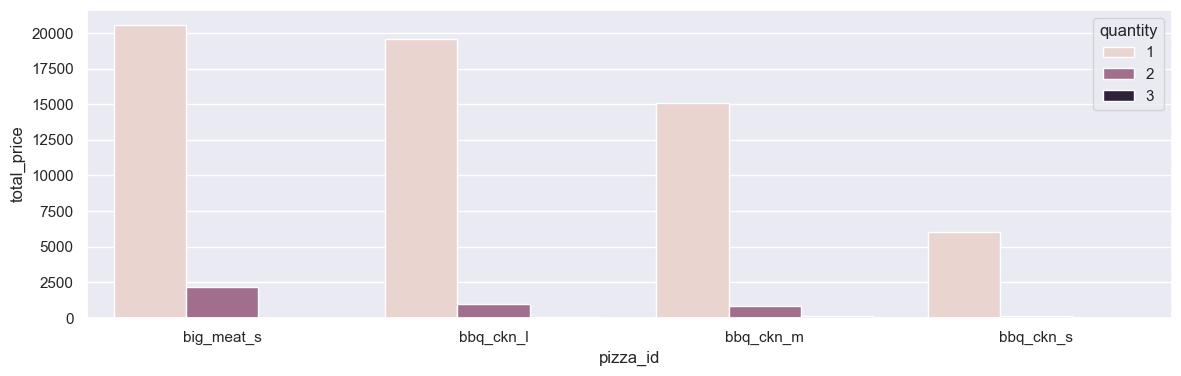

In [13]:
sales_gen = df.groupby(['pizza_id','quantity'], as_index = False)['total_price'].sum().head(10).sort_values(by = 'total_price', ascending = False)
sns.barplot(x = 'pizza_id', y = 'total_price', data = sales_gen, hue = 'quantity')

<h1>Answer the query</h1>

What are our best and worst-selling pizzas?

Text(0.5, 1.0, 'Top 5 Pizzas by Sales')

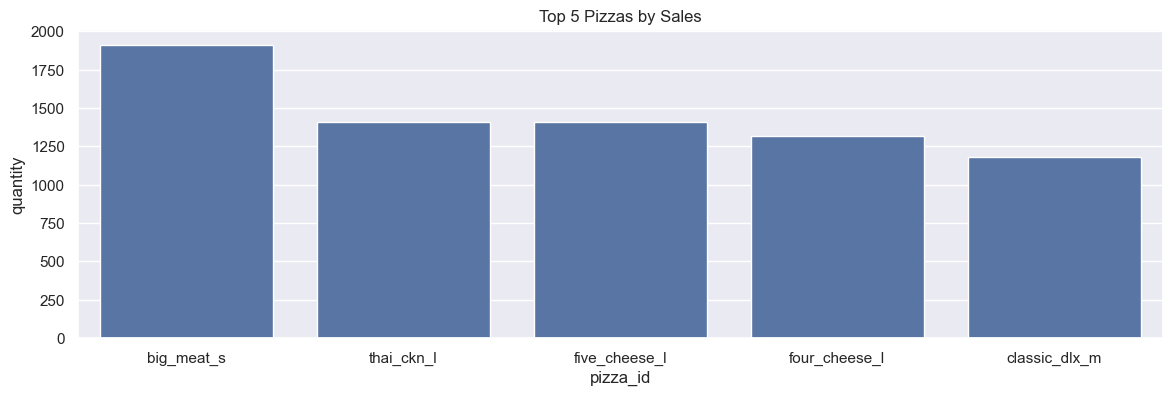

In [14]:
sales_gen = df.groupby(['pizza_id'], as_index = False)['quantity'].sum().sort_values(by = 'quantity', ascending = False).head(5)
sns.barplot(x = 'pizza_id', y = 'quantity', data = sales_gen)
plt.title('Top 5 Pizzas by Sales')

Text(0.5, 1.0, 'Bottom 5 Pizzas by Sales')

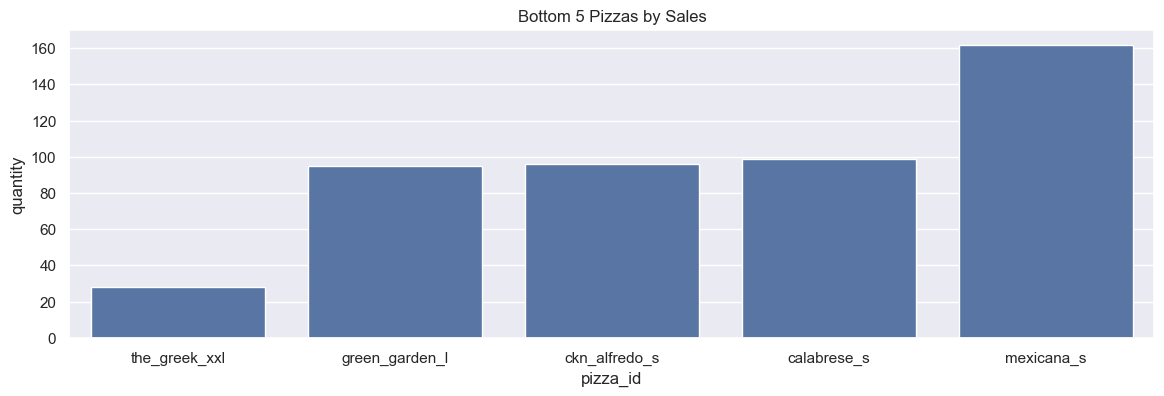

In [15]:
sales_gen = df.groupby(['pizza_id'], as_index = False)['quantity'].sum().sort_values(by = 'quantity', ascending = True).head(5)
sns.barplot(x = 'pizza_id', y = 'quantity', data = sales_gen)
plt.title('Bottom 5 Pizzas by Sales')

In [16]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

<h3>Which size of pizza is ordered the most? </h3>

<Axes: xlabel='pizza_size', ylabel='quantity'>

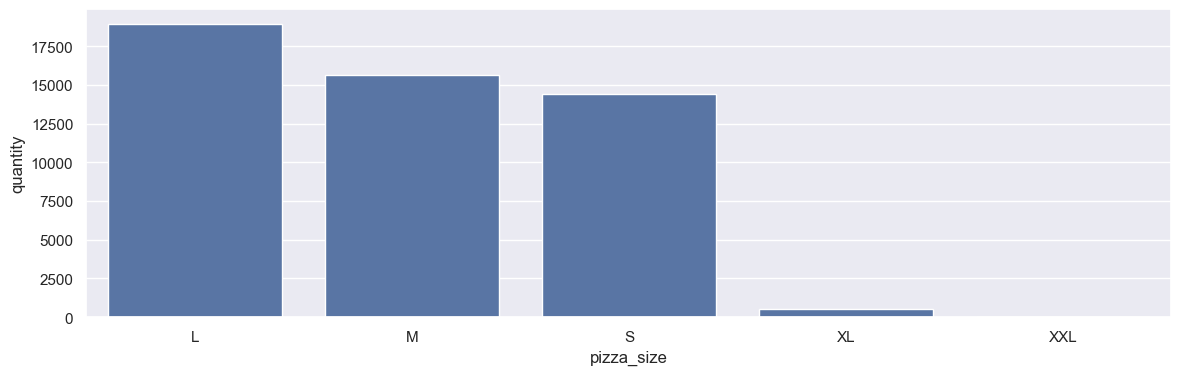

In [17]:
sales_gen = df.groupby(['pizza_size'], as_index = False)['quantity'].sum().sort_values(by = 'quantity', ascending = False)
sns.barplot(x = 'pizza_size', y = 'quantity', data = sales_gen)

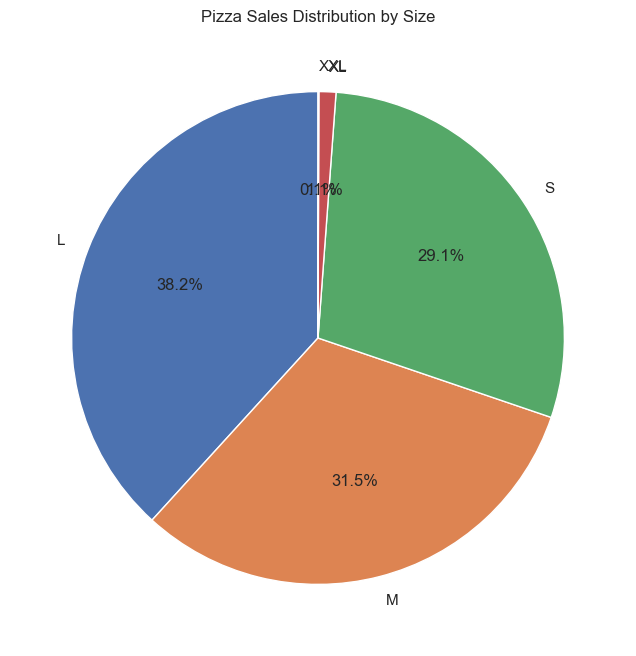

In [29]:
# Pie chart
plt.figure(figsize=(8, 8))

# Assuming 'sizes' is a list of size labels ('s', 'm', 'l', 'xl', 'xxl')
sizes = sales_gen['quantity']
labels = sales_gen['pizza_size']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pizza Sales Distribution by Size')

# Display the pie chart
plt.show()